In [0]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [0]:
songs = pd.read_csv('/content/drive/My Drive/music/songs.csv')

In [0]:
songs = songs.sort_values(["song_id"],  ascending=[True])

In [0]:
songs.shape

(4878, 8)

In [0]:
songs.head()

,song_id,length,genre,artist,composer,lyricist,language,isrc
2409,0,237505,444,42,1062,982,31,KRA401500584
3041,2,227343,465,818,909,836,3,TWA531657203
1722,5,219150,465,55,960,520,17,JPB601402020
891,6,252969,458,838,1433,1524,3,TWA451601501
2228,7,320888,465,785,389,1078,3,TWA531530004


In [0]:
songs.language.value_counts()

3     3827
52     416
31     371
17     127
10      86
24      31
0       19
45       1
Name: language, dtype: int64

In [0]:
transactions = pd.read_csv('/content/drive/My Drive/music/transactions.csv')

In [0]:
transactions.isnull().sum()

user_id       0
song_id       0
rec_loc       0
rec_screen    0
entry         0
listen        0
dtype: int64

In [0]:
transactions.head()

,user_id,song_id,rec_loc,rec_screen,entry,listen
0,5,5,discover,Online playlist more,online-playlist,0
1,7,7,search,Search,song,1
2,14,14,discover,Online playlist more,song-based-playlist,0
3,22,22,my library,Local playlist more,local-library,0
4,24,24,search,Online playlist more,online-playlist,0


In [0]:
transactions.shape

(1819855, 6)

In [0]:
transactions[transactions.song_id == 5]

,user_id,song_id,rec_loc,rec_screen,entry,listen
0,5,5,discover,Online playlist more,online-playlist,0
21189,8140,5,my library,Local playlist more,local-library,1
23165,5876,5,discover,Discover Genre,online-playlist,0
26250,10318,5,my library,Local playlist more,local-playlist,1
28689,1459,5,my library,Local playlist more,local-library,1
...,...,...,...,...,...,...
1756435,2777,5,my library,Local playlist more,local-library,1
1771279,13528,5,my library,Local playlist more,local-playlist,0
1776928,1162,5,my library,Local playlist more,local-playlist,0
1810565,6381,5,my library,Local playlist more,local-playlist,1


In [0]:
transactions.entry.value_counts()

local-library             585531
online-playlist           550462
local-playlist            302692
listen-with                80370
radio                      74491
album                      68861
top-hits-for-artist        63781
song                       47309
song-based-playlist        42481
topic-article-playlist      3411
artist                       399
my-daily-playlist             67
Name: entry, dtype: int64

In [0]:
transactions.user_id.value_counts()

1759     1854
642      1757
1484     1292
155      1291
315      1239
         ... 
23414       1
22484       1
23668       1
14443       1
24047       1
Name: user_id, Length: 12379, dtype: int64

In [0]:
transactions.song_id.value_counts()

98      7254
38      7085
266     6865
150     6741
412     6409
        ... 
8781      48
9049      47
7880      45
7421      45
8535      40
Name: song_id, Length: 4878, dtype: int64

In [0]:
merge = pd.merge(songs, transactions, on='song_id')

In [0]:
merge.shape

(1819855, 13)

In [0]:
merge.head()

,song_id,length,genre,artist,composer,lyricist,language,isrc,user_id,rec_loc,rec_screen,entry,listen
0,0,237505,444,42,1062,982,31,KRA401500584,1772,my library,Album more,album,0
1,0,237505,444,42,1062,982,31,KRA401500584,4773,discover,Online playlist more,online-playlist,0
2,0,237505,444,42,1062,982,31,KRA401500584,10217,discover,Online playlist more,online-playlist,0
3,0,237505,444,42,1062,982,31,KRA401500584,14691,explore,Online playlist more,topic-article-playlist,0
4,0,237505,444,42,1062,982,31,KRA401500584,16140,my library,Local playlist more,local-library,0


In [0]:
merge[merge.user_id == 24044]

,song_id,length,genre,artist,composer,lyricist,language,isrc,user_id,rec_loc,rec_screen,entry,listen
1520314,5049,264359,458,804,1538,1510,3,TWS411400040,24044,explore,Online playlist more,online-playlist,0
1560293,5457,219951,444,112,563,661,31,KRA301600439,24044,explore,Album more,album,0
1608749,6039,276480,465,577,1344,1389,3,TWA210722802,24044,explore,Online playlist more,online-playlist,0
1792533,8949,220760,465,370,739,693,3,TWA531636502,24044,explore,Album more,album,0


In [0]:
train = pd.read_csv('/content/drive/My Drive/music/train.csv')
test = pd.read_csv('/content/drive/My Drive/music/test.csv')

In [0]:
train.head(10)

,user_id,city,age,reg_method,reg_date,ex_date,gender
0,13827,14,29,9,20130112,20180203,female
1,6618,13,19,4,20160313,20180106,female
2,7615,22,33,9,20060314,20170930,female
3,15535,13,48,9,20110402,20171003,female
4,17708,18,20,4,20160102,20161105,female
5,17849,15,41,9,20060330,20170910,male
6,714,15,37,3,20120725,20171005,male
7,9824,22,19,3,20160221,20171022,male
8,4579,14,27,9,20110224,20171026,female
9,23916,4,31,4,20151227,20170316,male


In [0]:
test.head()

,user_id,city,age,reg_method,reg_date,ex_date,gender
0,16169,13,21,3,20120118,20180604,NaN
1,4694,13,0,3,20150110,20171014,NaN
2,10654,1,18,3,20150402,20180312,NaN
3,9327,14,16,4,20160824,20171002,NaN
4,3631,22,26,9,20100927,20171225,NaN


In [0]:
train['gender'].value_counts()

male      3600
female    3400
Name: gender, dtype: int64

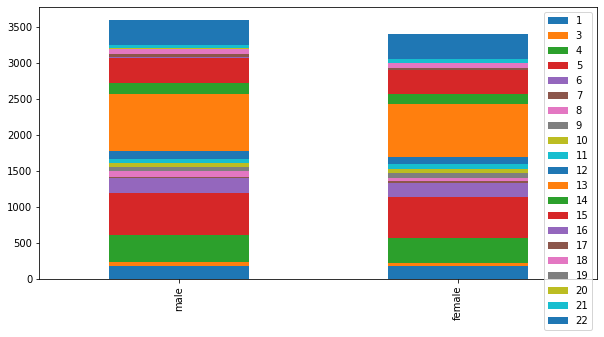

In [0]:
male = train[train['gender']=='male']['city'].value_counts()
female = train[train['gender']=='female']['city'].value_counts()
dfs = pd.DataFrame([male,female])
dfs.index = ['male','female']
dfs.plot(kind='bar',stacked=True, figsize=(10,5))

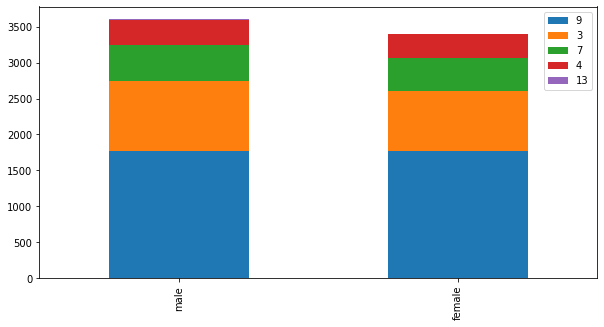

In [0]:
def bar_chart(feature):
  male = train[train['gender']=='male'][feature].value_counts()
  female = train[train['gender']=='female'][feature].value_counts()
  dfs = pd.DataFrame([male,female])
  dfs.index = ['male','female']
  dfs.plot(kind='bar',stacked=True, figsize=(10,5))

bar_chart('reg_method')

In [0]:
print(train.shape)
print(merge.shape)

(7000, 7)
(1819855, 13)


transaction - songs : song_id로 합치기
transaction - train : user_id로 합치기

In [0]:
merge2 = pd.merge(merge, train, on='user_id')
merge2.shape


(1019674, 19)

In [0]:
merge2.tail(10)

,song_id,length,genre,artist,composer,lyricist,language,isrc,user_id,rec_loc,rec_screen,entry,listen,city,age,reg_method,reg_date,ex_date,gender
1019664,5049,264359,458,804,1538,1510,3,TWS411400040,24044,explore,Online playlist more,online-playlist,0,5,18,3,20141206,20170616,female
1019665,5457,219951,444,112,563,661,31,KRA301600439,24044,explore,Album more,album,0,5,18,3,20141206,20170616,female
1019666,6039,276480,465,577,1344,1389,3,TWA210722802,24044,explore,Online playlist more,online-playlist,0,5,18,3,20141206,20170616,female
1019667,8949,220760,465,370,739,693,3,TWA531636502,24044,explore,Album more,album,0,5,18,3,20141206,20170616,female
1019668,6463,262803,465,676,1112,1020,10,TWA239200073,23201,my library,Album more,album,0,1,45,3,20130523,20170618,female
1019669,6672,227323,465,25,786,198,52,GBCTA0900344,24047,my library,Local playlist more,local-library,0,13,19,3,20130217,20170414,male
1019670,6734,200661,359,374,494,444,52,GBCEL1600383,12447,radio,Radio,radio,0,5,50,3,20161126,20161203,male
1019671,7462,242102,465,288,844,794,52,QM33K1500042,12447,radio,Radio,radio,0,5,50,3,20161126,20161203,male
1019672,8386,182935,465,324,938,868,52,GBPS61600003,12447,radio,Radio,radio,0,5,50,3,20161126,20161203,male
1019673,8132,299990,465,672,1618,1622,3,TWK231307212,16754,my library,Local playlist more,local-library,0,4,30,9,20040331,20170917,female


In [0]:
merge2 = merge2.drop(['length', 'genre','artist','composer','lyricist','language'], axis = 1)

In [0]:
merge2.shape

(1019674, 17)

In [0]:
user_group = merge2['genre'].groupby(merge2['user_id'])

In [0]:
user_group.size()

user_id
1         220
5         393
7         224
9        1000
10        350
         ... 
24937      14
24940      11
24960      27
24966       9
24977      12
Name: genre, Length: 6987, dtype: int64

age, genre,

In [0]:
merge2['term'] = merge2['ex_date'] - merge2['reg_date']

In [0]:
merge2['term'].mean()

53121.36579141961

In [0]:
merge3 = merge2[merge2.listen == 1]

In [0]:
merge3 = merge3.drop(['genre','length','artist','composer','lyricist','language','term'], axis=1)

In [0]:
merge3.gender = merge3.gender.map({'male':1, 'female':0})

In [0]:
td = pd.get_dummies(merge3.drop(['gender'], axis=1))
td_label = merge3['gender']


In [0]:
td_label.head()

1    0
2    0
3    0
4    0
5    0
Name: gender, dtype: int64

In [0]:
split = int(td.shape[0] * 0.2)

In [0]:
td.head()

,song_id,listen,city,age,reg_method,rec_loc_discover,rec_loc_explore,rec_loc_listen with,rec_loc_my library,rec_loc_notification,rec_loc_radio,rec_loc_search,rec_loc_settings,rec_screen_Album more,rec_screen_Artist more,rec_screen_Concert,rec_screen_Discover Chart,rec_screen_Discover Feature,rec_screen_Discover Genre,rec_screen_Discover New,rec_screen_Explore,rec_screen_Local playlist more,rec_screen_My library,rec_screen_My library_Search,rec_screen_Online playlist more,rec_screen_Others profile more,rec_screen_Payment,rec_screen_Radio,rec_screen_Search,rec_screen_Search Home,rec_screen_Search Trends,rec_screen_Self profile more,rec_screen_Unknown,entry_album,entry_artist,entry_listen-with,entry_local-library,entry_local-playlist,entry_my-daily-playlist,entry_online-playlist,entry_radio,entry_song,entry_song-based-playlist,entry_top-hits-for-artist,entry_topic-article-playlist
1,2,1,6,26,3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
2,32,1,6,26,3,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
3,37,1,6,26,3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
4,38,1,6,26,3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
5,48,1,6,26,3,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0


In [0]:

tr = td[:split]
val = td[split:]
tr_label = td_label[:split]
val_label = td_label[split:]

In [0]:
pd.crosstab(merge2.gender, merge2.composer, margins=True)

composer,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,2232,2233,2234,2235,2236,2237,2238,2239,2240,2241,2242,2243,2244,2245,2246,2247,2248,2249,2250,2251,2252,2253,2254,2255,2256,2257,2258,2259,2260,2261,2262,2263,2264,2265,2266,2267,2268,2269,2270,All
gender,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
female,29,32,22,27,31,24,42,75,36,69,482,72,85,69,307,766,34,49,123,104,23,736,20,16,18,45,617,245,50,29,13,71,78,54,17,1681,48,1402,1139,27,...,108,33,75,38,1191,918,108,109,91,21,34,78,16,56,40,78,22,22,59,228,90,408,27,109,38,43,25,79,38,48,35,14,26,82,60,11,48,42,19,493585
male,13,12,10,14,15,9,45,57,16,30,673,54,96,77,345,801,33,49,103,105,35,797,18,18,17,68,680,263,55,33,23,86,92,72,22,2023,59,1542,1410,16,...,146,30,113,128,1223,980,126,141,51,21,9,51,17,33,31,56,14,15,39,142,52,287,38,93,40,23,16,50,25,33,20,16,15,69,36,18,22,23,22,526089
All,42,44,32,41,46,33,87,132,52,99,1155,126,181,146,652,1567,67,98,226,209,58,1533,38,34,35,113,1297,508,105,62,36,157,170,126,39,3704,107,2944,2549,43,...,254,63,188,166,2414,1898,234,250,142,42,43,129,33,89,71,134,36,37,98,370,142,695,65,202,78,66,41,129,63,81,55,30,41,151,96,29,70,65,41,1019674


In [0]:
def bar_chart_merge(feature):
  male = merge2[merge2['gender']=='male'][feature].value_counts()
  female = merge2[merge2['gender']=='female'][feature].value_counts()
  dfs = pd.DataFrame([male,female])
  dfs.index = ['male','female']
  dfs.plot(kind='bar',stacked=True, figsize=(10,5))

bar_chart_merge('rec_screen')

In [0]:
merge2.user_id.value_counts()

In [0]:
merge2.shape

(1019674, 19)

In [0]:
merge2.info()

In [0]:
merge2.gender = merge2.gender.map({'male':1, 'female':0})

In [0]:
merge2.head(10)

In [0]:
merge2.isnull().sum()

In [0]:
df1 = merge2.drop('isrc', axis=1)

In [0]:
df1.head()

In [0]:
len(df1.lyricist.unique())

In [0]:
tr_label[0:4]

1    0
2    0
3    0
4    0
Name: gender, dtype: int64

In [0]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB

In [0]:
SVC.fit(tr, tr_label)
prediction = model.predict(val)
accuracy = round(SVC.score(train_data, train_label) * 100, 2)
print("Accuracy : ", accuracy, "%")

TypeError: ignored

In [0]:
model = SVC()
model.fit(tr, tr_label)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [0]:
model.predict(val)

In [0]:
model.score(val, val_label)